<a href="https://colab.research.google.com/github/VagundaMatus/MyApp/blob/master/ZnalostneSystemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas


In [10]:
hriby = pandas.read_csv("mushrooms.csv", sep=',')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
hriby.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [13]:
hriby.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [14]:
hriby_cisla = pandas.get_dummies(hriby,columns=["cap-shape","cap-surface","cap-color", "bruises", "odor", "gill-size", "gill-color", "stalk-shape", "veil-color", "habitat"],drop_first=False)

In [15]:
hriby_cisla.head()

,class,gill-attachment,gill-spacing,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,ring-number,ring-type,spore-print-color,population,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,veil-color_n,veil-color_o,veil-color_w,veil-color_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,f,c,e,s,s,w,w,p,o,p,k,s,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,e,f,c,c,s,s,w,w,p,o,p,n,n,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2,e,f,c,c,s,s,w,w,p,o,p,n,n,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,p,f,c,e,s,s,w,w,p,o,p,k,s,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,e,f,w,e,s,s,w,w,p,o,e,n,a,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
X_train, X_test, y_train, y_test= train_test_split(hriby_cisla[['cap-shape_b','cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s','cap-shape_x','cap-surface_f','cap-surface_g','cap-surface_s','cap-surface_y','cap-color_b','cap-color_c','cap-color_e','cap-color_g','cap-color_n','cap-color_p','cap-color_r','cap-color_u','cap-color_w','cap-color_y','bruises_f','bruises_t','odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y','gill-size_b','gill-size_n','gill-color_b','gill-color_e','gill-color_g','gill-color_h','gill-color_k','gill-color_n','gill-color_o','gill-color_p','gill-color_r','gill-color_u','gill-color_w','gill-color_y','stalk-shape_e','stalk-shape_t','veil-color_n','veil-color_o','veil-color_w','veil-color_y','habitat_d','habitat_g','habitat_l','habitat_m','habitat_p','habitat_u','habitat_w']], hriby_cisla['class'], test_size = 0.7)

In [18]:
clf=DecisionTreeClassifier()

In [19]:
clf=clf.fit(X_train,y_train)

In [20]:
y_pred=clf.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.997186565851943


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
X_train=hriby_cisla[['cap-shape_b','cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s','cap-shape_x','cap-surface_f','cap-surface_g','cap-surface_s','cap-surface_y','cap-color_b','cap-color_c','cap-color_e','cap-color_g','cap-color_n','cap-color_p','cap-color_r','cap-color_u','cap-color_w','cap-color_y','bruises_f','bruises_t','odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y','gill-size_b','gill-size_n','gill-color_b','gill-color_e','gill-color_g','gill-color_h','gill-color_k','gill-color_n','gill-color_o','gill-color_p','gill-color_r','gill-color_u','gill-color_w','gill-color_y','stalk-shape_e','stalk-shape_t','veil-color_n','veil-color_o','veil-color_w','veil-color_y','habitat_d','habitat_g','habitat_l','habitat_m','habitat_p','habitat_u','habitat_w']]
y_train=hriby_cisla['class']

In [30]:
clf=DecisionTreeClassifier(max_leaf_nodes = 10)

In [31]:
clf=clf.fit(X_train,y_train)

In [32]:
vlastnosti=['cap-shape_b','cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s','cap-shape_x','cap-surface_f','cap-surface_g','cap-surface_s','cap-surface_y','cap-color_b','cap-color_c','cap-color_e','cap-color_g','cap-color_n','cap-color_p','cap-color_r','cap-color_u','cap-color_w','cap-color_y','bruises_f','bruises_t','odor_a','odor_c','odor_f','odor_l','odor_m','odor_n','odor_p','odor_s','odor_y','gill-size_b','gill-size_n','gill-color_b','gill-color_e','gill-color_g','gill-color_h','gill-color_k','gill-color_n','gill-color_o','gill-color_p','gill-color_r','gill-color_u','gill-color_w','gill-color_y','stalk-shape_e','stalk-shape_t','veil-color_n','veil-color_o','veil-color_w','veil-color_y','habitat_d','habitat_g','habitat_l','habitat_m','habitat_p','habitat_u','habitat_w']

In [33]:
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image

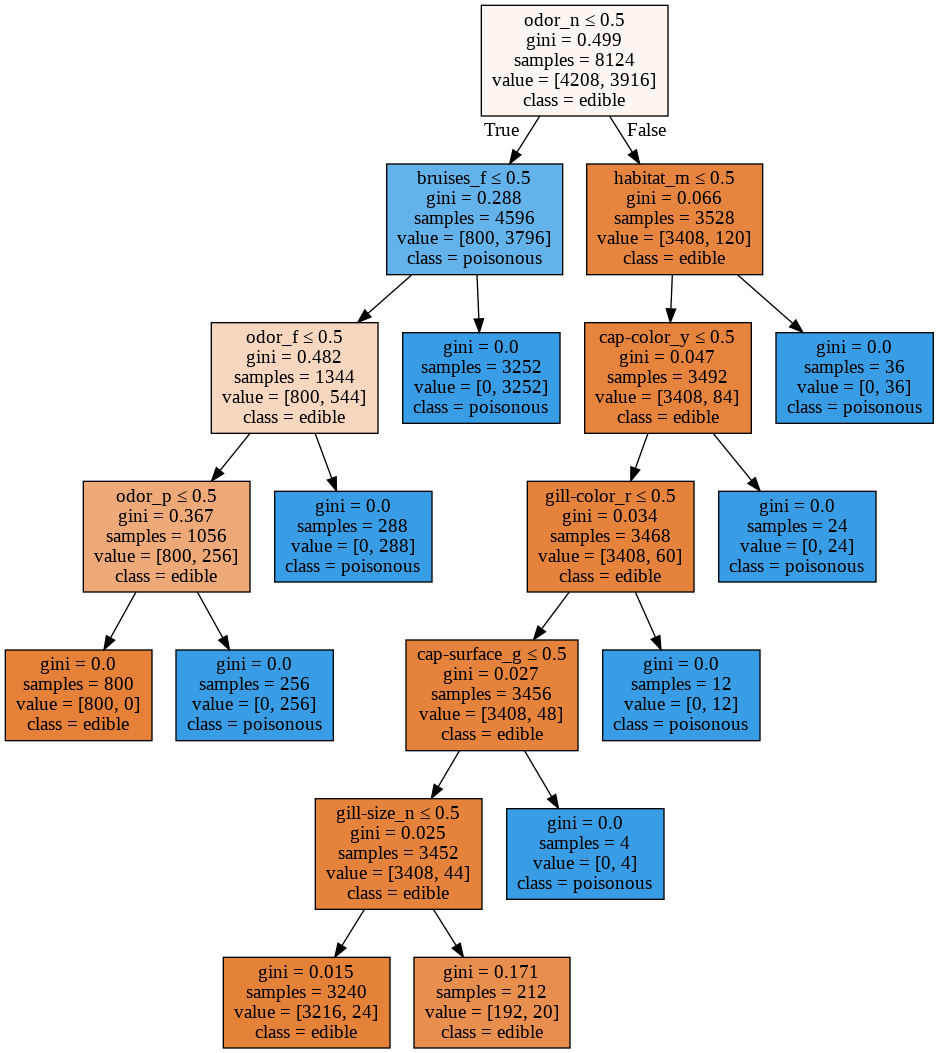

In [34]:
dot_data=StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=False,
                special_characters=True, feature_names=vlastnosti,class_names=['edible','poisonous'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('skuska.png')
Image(graph.create_png())


In [35]:
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names, Y):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    pathto=dict()

    global k
    k = 0
    def recurse(node, depth, parent):
        global k
        indent = "  " * depth

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            s= "{} <= {} ".format( name, threshold, node )
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s

            recurse(tree_.children_left[node], depth + 1, node)
            s="{} > {}".format( name, threshold)
            if node == 0:
                pathto[node]=s
            else:
                pathto[node]=pathto[parent]+' & ' +s
            recurse(tree_.children_right[node], depth + 1, node)
        else:
            k=k+1
            print(k,')',pathto[parent], tree_.value[node])
    recurse(0, 1, 0)
   
tree_to_code(clf, vlastnosti, y_train)

1 ) odor_n <= 0.5  & bruises_f <= 0.5  & odor_f <= 0.5  & odor_p <= 0.5  [[800.   0.]]
2 ) odor_n <= 0.5  & bruises_f <= 0.5  & odor_f <= 0.5  & odor_p > 0.5 [[  0. 256.]]
3 ) odor_n <= 0.5  & bruises_f <= 0.5  & odor_f > 0.5 [[  0. 288.]]
4 ) odor_n <= 0.5  & bruises_f > 0.5 [[   0. 3252.]]
5 ) odor_n > 0.5 & habitat_m <= 0.5  & cap-color_y <= 0.5  & gill-color_r <= 0.5  & cap-surface_g <= 0.5  & gill-size_n <= 0.5  [[3216.   24.]]
6 ) odor_n > 0.5 & habitat_m <= 0.5  & cap-color_y <= 0.5  & gill-color_r <= 0.5  & cap-surface_g <= 0.5  & gill-size_n > 0.5 [[192.  20.]]
7 ) odor_n > 0.5 & habitat_m <= 0.5  & cap-color_y <= 0.5  & gill-color_r <= 0.5  & cap-surface_g > 0.5 [[0. 4.]]
8 ) odor_n > 0.5 & habitat_m <= 0.5  & cap-color_y <= 0.5  & gill-color_r > 0.5 [[ 0. 12.]]
9 ) odor_n > 0.5 & habitat_m <= 0.5  & cap-color_y > 0.5 [[ 0. 24.]]
10 ) odor_n > 0.5 & habitat_m > 0.5 [[ 0. 36.]]


In [36]:
#odor_n= ziadny zapach
#bruises_f= bez modrin
#odor_f=odporny zapach
#odor_p=štiplavý zapach
#habitat_m=prostredie luky
#cap-color_y=zlta farba capicky
#gill-color_r=zelene ziabre
#cap-surface_g=drázkova capicka
#gill-size_n=uzke ziabre